Выполнить классификацию изображений на наборе notMNIST_small. Есть блокнот как загрузить с учетом того что вы уже изучили. 

In [3]:
from keras import models
from keras import optimizers
from keras import layers
from keras.metrics import AUC
from matplotlib import pyplot as plt
import numpy as np
import tarfile
import os, shutil
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras import utils
import tensorflow as tf



In [1]:
#!pip install keras
#!pip install tensorflow
#!pip install opencv-python

Установим папку с изображениями. Отобразим тестовую картинку.

(28, 28, 3)


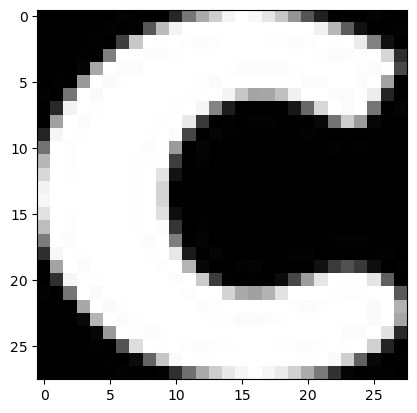

In [4]:
base_dir = './notMNIST_small' 

img = cv2.imread("./notMNIST_small/C/Rm9sa3NCbGFjay50dGY=.png")    # смотрим вид изображения
print(img.shape)
plt.imshow(img)
plt.show()

Оценим количество экземпляров в каждой папке:

In [5]:
folders = 'ABCDEFGHIJ'    # имеющиеся буквы
for folder in folders:
  print(f"total {folder} images: {len(os.listdir(f'{base_dir}/{folder}'))}")    # смотрим количество данных каждого класса

total A images: 1873
total B images: 1873
total C images: 1873
total D images: 1873
total E images: 1873
total F images: 1873
total G images: 1872
total H images: 1872
total I images: 1872
total J images: 1872


Создадим 2 массива. В imgs будут храниться пути к файлам картинок, а в labels будут храниться метки классов.

In [6]:
imgs = []
labels = []
for folder in folders:    # каждая папка с буквами
  for img in os.listdir(base_dir + f"/{folder}"):   # каждая буква
    if img.endswith('.png'):    # только png
      try:    # если удалось прочитать 
        #imgs.append(cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0])   # добавляем изображение
        if not np.all(cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0] ==cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0][0]):
            imgs.append(cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0])
            labels.append(folder)   # добавляем метку класса
      except:   # если возникла ошибка при чтении
        print(base_dir + f"/{folder}/{img}")     # выводим название изображение, которое не удалось прочитать
        continue
imgs = np.array(imgs).astype('float32')/255.    # т.к у нас картинки имеют 255 оттенков серого, разделим на 255 чтобы были числа 0-1
#print(imgs[5])

./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png


Преобразуем метки ABCDEFGHIJ в категориальные данные вида [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

A
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


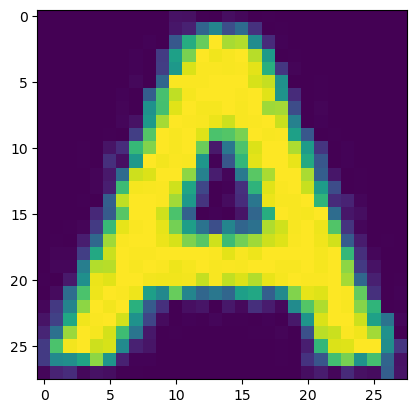

In [7]:
def to_categorical(labels):
  
  categories = 'ABCDEFGHIJ'
  new_labels = np.zeros(shape=(len(labels), len(categories)))
  for i, label in enumerate(labels):
    new_labels[i][categories.find(label)] = 1 
  return new_labels
print(labels[0])    # выводим пример изображения с меткой
labels = to_categorical(labels)
plt.imshow(imgs[0])
print(labels[0])


Перемешаем данные:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


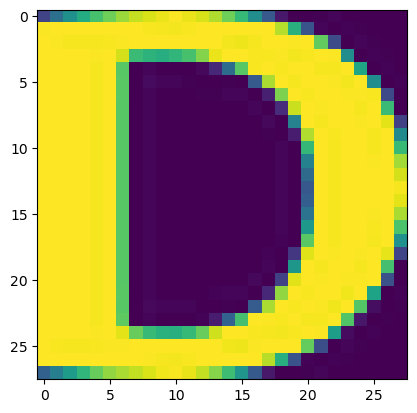

In [9]:
indices = np.arange(labels.shape[0])    
np.random.shuffle(indices)
imgs = imgs[indices]
labels = labels[indices]

plt.imshow(imgs[0])
print(labels[0])

Разобъем выборку на тестовоую и тренировочную. Также преобразуем картинки 28*28 в векторы размерностью 784

In [35]:
# разбиваем на тестовую и тренировочную выборку
test_imgs = imgs[:500]
test_labels = labels[:500]
train_imgs = imgs[500:]
train_labels = labels[500:]

train_imgs_flatten = np.reshape(train_imgs,(17942,-1))
test_imgs_flatten = np.reshape(test_imgs,(500,-1))


print("Train images shape: ", train_imgs.shape)
print("Test images shape: ", test_imgs.shape)
print("Train labels shape: ", train_labels.shape)
print("Test labels shape: ", test_labels.shape)

Train images shape:  (17942, 28, 28)
Test images shape:  (500, 28, 28)
Train labels shape:  (17942, 10)
Test labels shape:  (500, 10)


Создадим нейросеть средствами keras. Добавим 1 внутренний слой. Выходной слой состоит из 10 нейронов, каждый нейрон соответствует одному классу.

In [ ]:

adam = tf.keras.optimizers.Adam(learning_rate=0.03)
model = Sequential()
model.add(Dense(50, input_dim=784, activation="relu"))
#model.add(Conv1D(3,3,padding = "same",activation= "relu"))
model.add(Dense(200, activation="relu"))
#model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))
#model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy","AUC"])
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy','auc'])
history = model.fit(train_imgs_flatten, train_labels, batch_size=45, epochs=20, verbose = 1)

score = model.evaluate(test_imgs_flatten, test_labels, verbose=1)
print("\nTest loss :", score[0])
print('Test   accuracy:', score[1])
print('Test   auc:', score[2])
#model.evaluate

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 200)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,460 (201.02 KB)

 Trainable params: 51,460 (201.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3653 - auc: 0.8254 - loss: 0.3018
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5399 - auc: 0.9117 - loss: 0.1904
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5644 - auc: 0.9165 - loss: 0.1840
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5685 - auc: 0.9194 - loss: 0.1818
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5866 - auc: 0.9221 - loss: 0.1788
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6037 - auc: 0.9200 - loss: 0.1804
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6084 - auc: 0.9212 - loss: 0.1788
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6427 - auc: 0.9287 - loss: 0.1682
Epoch 9/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6320 - auc: 0.9291 - loss: 0.1709
Epoch 10/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6423 - auc: 0.9305 - loss: 0.1677

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential_15, built=True>>

Выводы: на тестовой выборке получился результат с точностью 0.7, auc 0.944

Создадим еще одну нейросеть, с конволюциями.

In [45]:
num_classes = 10
input_shape = (28, 28, 1)
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
batch_size = 128
epochs = 25
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.fit(train_imgs, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model2.evaluate(test_imgs, test_labels, verbose=1)
print("\nTest loss :", score[0])
print('Test   accuracy:', score[1])
#print('Test   auc:', score[2])

Epoch 1/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9463 - loss: 0.1566 - val_accuracy: 0.9415 - val_loss: 0.2221
Epoch 2/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9548 - loss: 0.1482 - val_accuracy: 0.9421 - val_loss: 0.2149
Epoch 3/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9504 - loss: 0.1573 - val_accuracy: 0.9426 - val_loss: 0.2162
Epoch 4/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9534 - loss: 0.1443 - val_accuracy: 0.9387 - val_loss: 0.2206
Epoch 5/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9506 - loss: 0.1484 - val_accuracy: 0.9432 - val_loss: 0.2151
Epoch 6/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9540 - loss: 0.1427 - val_accuracy: 0.9454 - val_loss: 0.2193
Epoch 7/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9565 - loss: 0.1387 - val_accuracy: 0.9432 - val_loss: 0.2174
Epoch 8/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9533 - loss: 0.1443 - val_accu

Данная конволюционная нейросеть показывает более высокие метрики - точность 92 процента.